In [2]:
from drift.robots import ETHModel
from drift.commons import Sequence, Animation
from collections import deque
%matplotlib inline

# Deep Deterministic Policy Gradient (DDPG) Model Analysis

The DDPG algorithm will be analysed in two ways: 
   
    - the effect of changes in vehicle dynamics on the performance of the model and 
    - the effect of changes in hyper-parameters on the performance of the model on a vehicle.

## Vehicle Dynamic Changes

The best DDPG control model [1] trained so far will be tested for robustness and performance by running it on vehicles with different dynamics. The control model was trained on a vehicle with dynamics that made it suitable to drift easily.

There are 9 main variables that determine the dynamics of the vehicle as discussed in the Methodology report. The table below describes the effect of each variables observed during experiments:

Variables | Description
----------|------------
$B$       | It affects how quickly the vehicle makes a turn (i.e. it affects the angular velocity)
$C$       | It affects the driftness of the vehicle (i.e. controls the friction of the wheels)
$D$       | It scales the lateral forces applied to the wheels
$C_{m1}$  | It scales the longitudinal velocity of the vehicle
$C_{m2}$  | same as $C_{m1}$ 
$C_{r}$   | ...
$C_{d}$   | ...
$I_{z}$   | Moment of Inertia
$m$       | Mass

The effect of each variables are however not independent. The `moment of inertia` and `mass` of the vehicle are kept constant during this analysis while the remaining parameters are changed.

[1]: Trial 4, Episode 228 (18-02-2019)

### Inference Runs Parameters 

| Inference (#) | B |  C  |   D  | $$C_{m1}$$ | $$C_{m2}$$ | $$C_{r}$$ | $$C_{d}$$ | Total Reward | Max $dt$ Reward | Mean Reward |
|:-------------:|:-:|:---:|:----:|:----------:|:----------:|:---------:|:---------:|:------------:|:---------------:|:-----------:|
|       1       | 8 | 9.5 | 2500 |    1250    |      3     |    100    |     45    |   -222.506   |      -0.057     |    -0.111   |
|       2       | 7 |  "  |   "  |      "     |      "     |     "     |     "     |    -614.90   |      -0.206     |    -0.307   |
|       3       | 9 |  "  |   "  |      "     |      "     |     "     |     "     |  - 1999.998  |      -0.999     |    -0.999   |
|       4       | 9 |  "  |   "  |      "     |      "     |     "     |     "     |       "      |        "        |      "      |

### Inference 1 | [table]

- The default model used for training
![alt-text][1]

### Inference 2 | [table]
- Lower Total Reward 
- Higher Max and Mean Reward compared to #1 
- Takes longer to reach steady state. 
- Decreasing 𝐵 increases the drifting property of the vehicle
![alt-text][2]


### Inference 3 | [table]
- While the Reward values signifies that the vehicle did not achieve drifting, the vehicle does. It however drifts with the vehicle facing the wrong direction. The steady state value been set so that the vehicle faces the center of the drift radius when drifting, however in this run the model is facing outward the radius. (i.e. 𝑣𝑦 is positive instead of been negative)
![alt-text][3]


### Inference 4 | [table]


[1]: assets/inference-run-1.png
[2]: assets/inference-run-2.png
[3]: assets/inference-run-3.png
[table]: #Inference-Runs-Parameters

In [1]:
path = "/home/zadiq/dev/@p/drift_project/data/26-02-2019/ddpg_run_3/eps-93--234.sequence"
sequence = Sequence.load(path)
sequence.plot()


NameError: name 'Sequence' is not defined

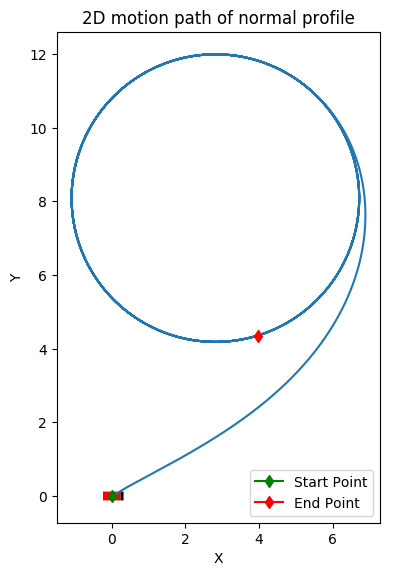

In [ ]:
path = "/home/zadiq/dev/@p/drift_project/data/inference/26-02-2019-3-eps-38--171-inference.sequence"
sequence = Sequence.load(path)
# sequence.plot()
ani = Animation(sequence)
ani.show()


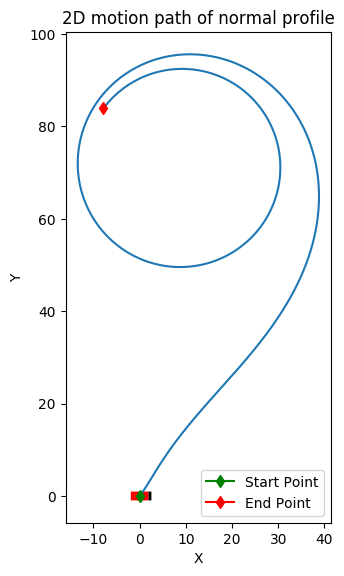

In [37]:
ani = Animation(sequence)
ani.show()